<a href="https://colab.research.google.com/github/brunatoloti/data-science-alura-cursos/blob/main/Data%20Science%3A%20Introdu%C3%A7%C3%A3o%20a%20an%C3%A1lise%20de%20s%C3%A9ries%20temporais/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series

## Alucar - Analisando as vendas

**Importando as bibliotecas**

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

**Carregando a base de dados da Alucar**

Base de dados fornecida pelo curso.

In [ ]:
alucar = pd.read_csv('/content/drive/MyDrive/Curso Alura/Data Science: Introdução a análise de séries temporais/Dados/alucar.csv')
alucar.head()

,mes,vendas
0,2017-01-31,10
1,2017-02-28,20
2,2017-03-31,33
3,2017-04-30,47
4,2017-05-31,63


**Fazendo algumas análises descritivas**

Formato da base de dados

In [ ]:
print(f'Quantidade de linhas dessa base de dados: {alucar.shape[0]}')
print(f'Quantidade de colunas dessa base de dados: {alucar.shape[1]}')

Quantidade de linhas dessa base de dados: 24
Quantidade de colunas dessa base de dados: 2


Como cada linha dessa base de dados corresponde ao total de vendas de cada mês e ela possui 24 linhas, temos registros de vendas de 2 anos. De fato:

In [ ]:
alucar.mes.values

array(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
       '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
       '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31',
       '2018-01-31', '2018-02-28', '2018-03-31', '2018-04-30',
       '2018-05-31', '2018-06-30', '2018-07-31', '2018-08-31',
       '2018-09-30', '2018-10-31', '2018-11-30', '2018-12-31'],
      dtype=object)

Verificando se há registros nulos na base de dados

In [ ]:
print(f'Quantidade de dados nulos na base de dados: {alucar.isna().sum().sum()}')

Quantidade de dados nulos na base de dados: 0


Verificando os tipos de dados da base de dados

In [ ]:
alucar.dtypes

mes       object
vendas     int64
dtype: object

Observe que o tipo da coluna *mes* é *object*. Porém, como vamos trabalhar com Séries Temporais, é interessante que essa coluna seja do tipo *datetime*.

Fazendo essa conversão.

In [ ]:
alucar['mes'] = pd.to_datetime(alucar['mes'])
alucar.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

**Fazendo algumas análises gráficas**

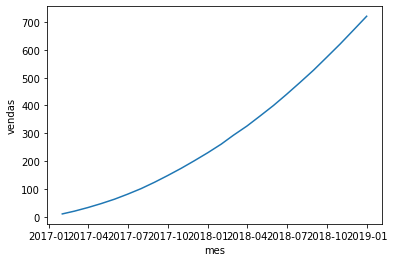

In [ ]:
sns.lineplot(x='mes', y='vendas', data=alucar)

Já conseguimos ver que, a medida que o tempo passa, as vendas estão aumentando. Porém, podemos melhorar bastante a visualização desse gráfico.

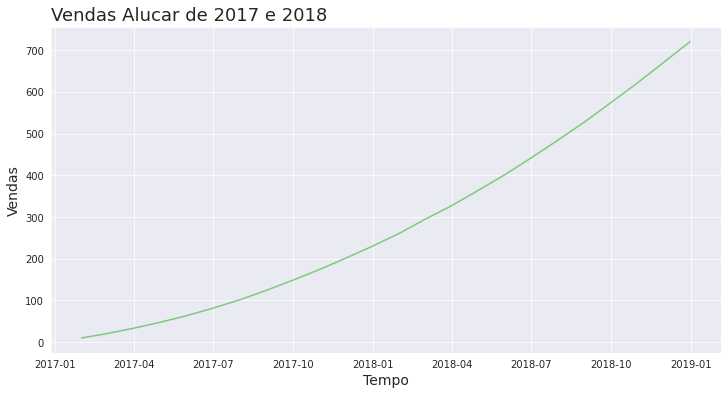

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='vendas', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Vendas', fontsize=14)
ax = ax

**Alucar - Decompondo as vendas**

Quanto aumentou, mês a mês, as vendas?

In [ ]:
alucar['aumento'] = alucar['vendas'].diff()
alucar.head()

,mes,vendas,aumento
0,2017-01-31,10,NaN
1,2017-02-28,20,10.0
2,2017-03-31,33,13.0
3,2017-04-30,47,14.0
4,2017-05-31,63,16.0


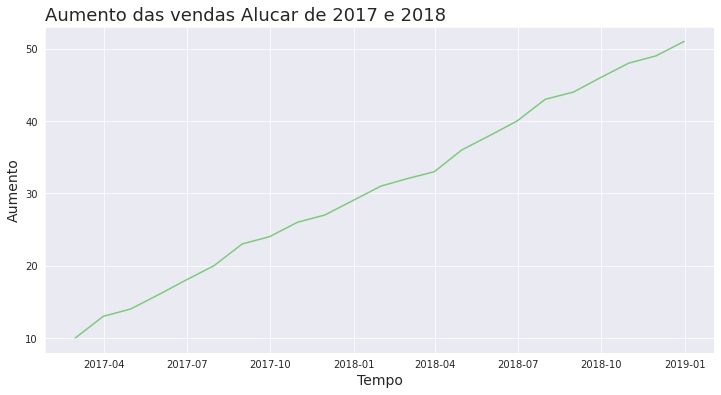

In [ ]:
sns.set_palette('Accent')
sns.set_style('darkgrid')
ax = sns.lineplot(x='mes', y='aumento', data=alucar)
ax.figure.set_size_inches(12,6)
ax.set_title('Aumento das vendas Alucar de 2017 e 2018', loc='left', fontsize=18)
ax.set_xlabel('Tempo', fontsize=14)
ax.set_ylabel('Aumento', fontsize=14)
ax = ax

Comparando mês a mês, conseguimos notar que, de fato, a Alucar está aumentando as vendas a medida que o tempo passa.

**Criando uma função para plotar gráficos**

Dessa forma, não precisamos sempre digitar a mesma coisa, só com poucas diferenças/alterações, toda vez que quisermos gerar um gráfico com esse padrão.

In [ ]:
def plotar(titulo, labelx, labely, x, y, dataset):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')
    ax = sns.lineplot(x=x, y=y, data=dataset)
    ax.figure.set_size_inches(12,6)
    ax.set_title(titulo, loc='left', fontsize=18)
    ax.set_xlabel(labelx, fontsize=14)
    ax.set_ylabel(labely, fontsize=14)
    ax = ax

Testando a função criada para plotar o mesmo gráfico acima

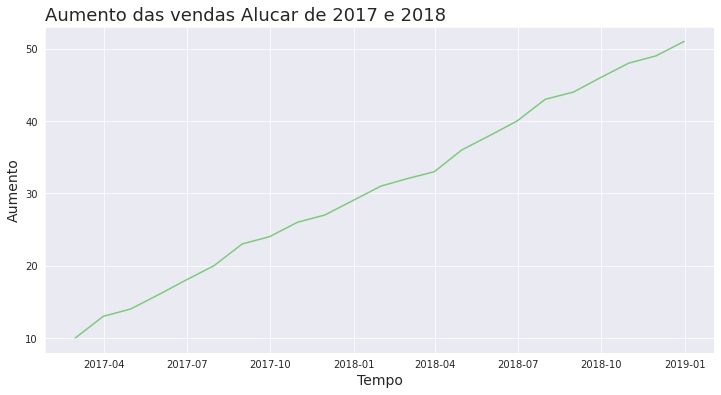

In [ ]:
plotar('Aumento das vendas Alucar de 2017 e 2018', 
       'Tempo', 
       'Aumento', 
       'mes', 
       'aumento', 
       alucar)

De fato, deu certo!

Qual a acelaração do crescimento nas vendas?

Para isso, fazemos uma decomposição, mas agora com a coluna *aumento*. 

In [ ]:
alucar['aceleracao'] = alucar['aumento'].diff()
alucar.head()

,mes,vendas,aumento,aceleracao
0,2017-01-31,10,NaN,NaN
1,2017-02-28,20,10.0,NaN
2,2017-03-31,33,13.0,3.0
3,2017-04-30,47,14.0,1.0
4,2017-05-31,63,16.0,2.0


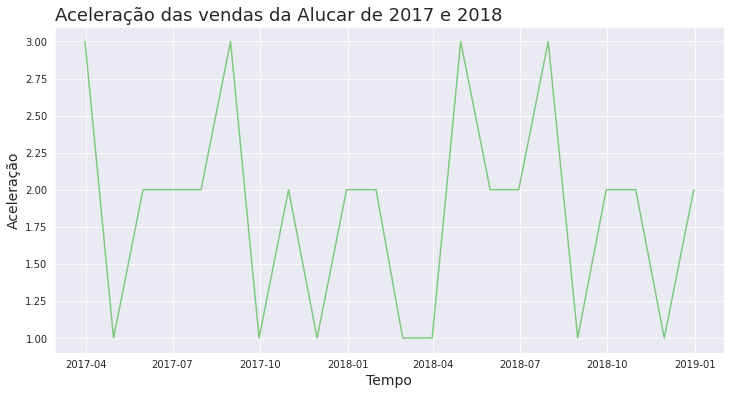

In [ ]:
plotar('Aceleração das vendas da Alucar de 2017 e 2018', 'Tempo', 'Aceleração', 'mes', 'aceleracao', alucar)

**Colocando esses gráficos em subplots de um mesmo plot**

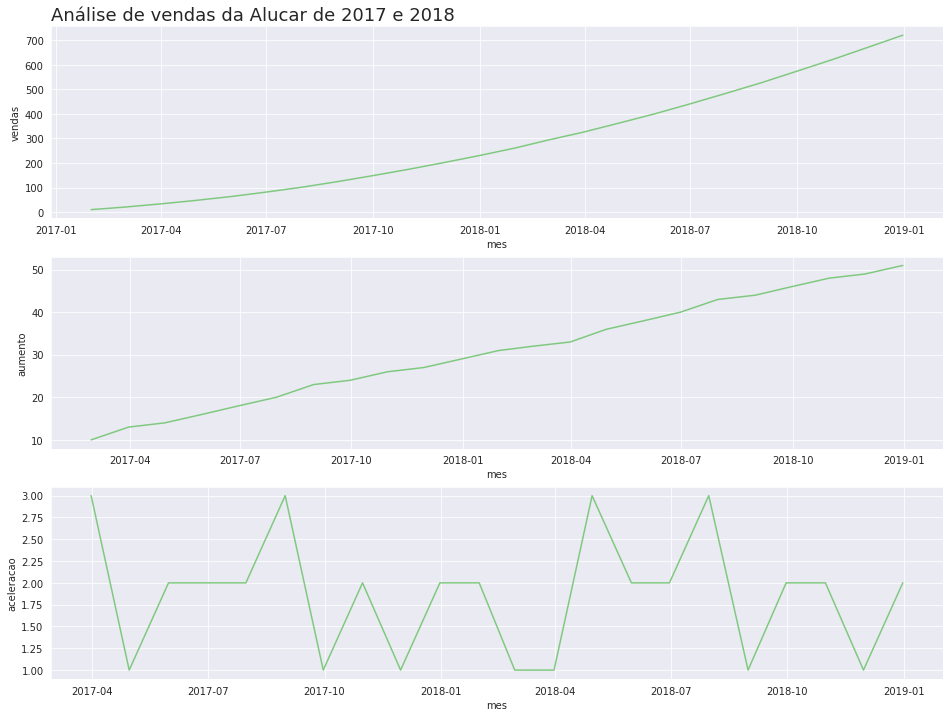

In [ ]:
plt.figure(figsize=(16, 12))
ax = plt.subplot(3, 1, 1)
ax.set_title('Análise de vendas da Alucar de 2017 e 2018', fontsize=18, loc='left')
sns.lineplot(x='mes', y='vendas', data=alucar)
ax = plt.subplot(3, 1, 2)
sns.lineplot(x='mes', y='aumento', data=alucar)
ax = plt.subplot(3, 1, 3)
sns.lineplot(x='mes', y='aceleracao', data=alucar)
ax = ax

**Criando uma função para plotar a comparação dos gráficos**

In [ ]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    plt.figure(figsize=(16, 12))
    ax = plt.subplot(3, 1, 1)
    ax.set_title(titulo, fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    ax = plt.subplot(3, 1, 2)
    sns.lineplot(x=x, y=y2, data=dataset)
    ax = plt.subplot(3, 1, 3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax = ax

Testando a função criada para plotar a mesma comparação acima

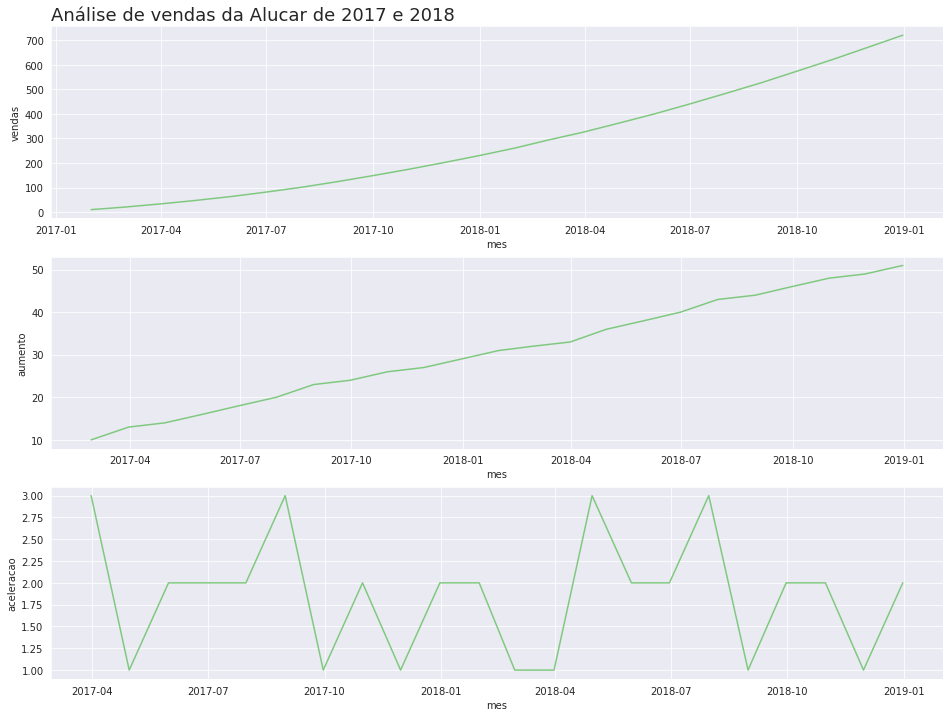

In [ ]:
plot_comparacao('mes', 
                'vendas', 
                'aumento', 
                'aceleracao', 
                alucar, 
                'Análise de vendas da Alucar de 2017 e 2018')

**Autocorrelação**

Descobrindo se os valores obtidos pela empresa nessa semana estarão ligados aos da semana passada.

Para isso, podemos usar a função de Autocorrelação.

Autocorrelação é uma medida de correlação entre as observações de uma série temporal. (Autocorrelação significa a correlação de valores de uma mesma variável ordenados no tempo). Para entender melhor o funcionamento dela, comparamos os valores com suas próprias correlações, ou seja, consigo mesmas.

Cada passo dado pelo gráfico de correlação será chamado de Lag. Então, a cada passo que damos, estaremos verificando a correlação entre os valores da observação com eles mesmos.

[Mais um pouco sobre Autocorrelação](https://pt.wikipedia.org/wiki/Autocorrela%C3%A7%C3%A3o)

In [ ]:
from pandas.plotting import autocorrelation_plot

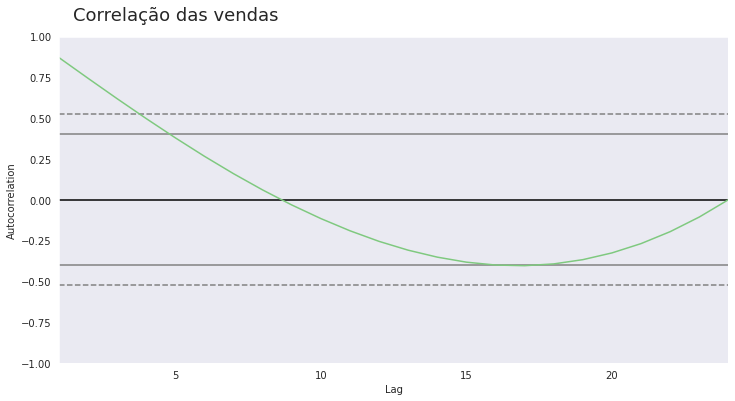

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['vendas'])
ax = ax

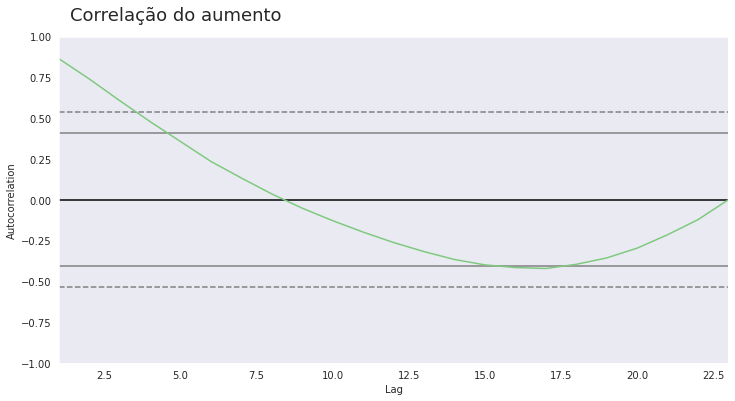

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aumento'][1:])
ax = ax

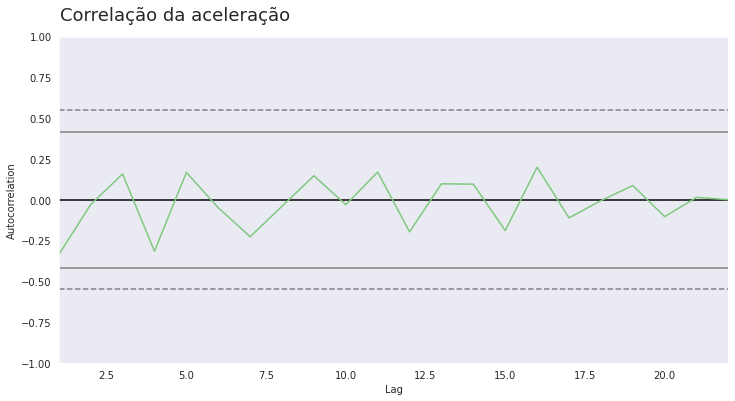

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração', fontsize=18, x=0.26, y=0.95)
autocorrelation_plot(alucar['aceleracao'][2:])
ax = ax

A partir desses gráficos, podemos concluir que os 7 primeiros dias parecem ter uma ligação muito forte com o da semana passada. Com o passar dos Lags, essa correlação decresce.

## Alucar - Analisando assinantes da newsletter

**Carregando a base de dados de newsletter da Alucar**

Base de dados fornecida pelo curso.

In [ ]:
assinantes = pd.read_csv('/content/drive/MyDrive/Curso Alura/Data Science: Introdução a análise de séries temporais/Dados/newsletter_alucar.csv')
assinantes.head()

,mes,assinantes
0,2017-01-31,0
1,2017-02-28,10
2,2017-03-31,21
3,2017-04-30,34
4,2017-05-31,49


**Fazendo algumas análises descritivas**

Verificando os tipos de variáveis que temos na base de dados.

Note que a coluna *mes* é do tipo *object*, mas, para trabalhar com Time Series, precisamos convertê-la para *datetime*.

In [ ]:
assinantes.dtypes

mes           object
assinantes     int64
dtype: object

Verificando quantas linhas e quantas colunas a base de dados possui

In [ ]:
print(f'Quantidade de linhas na base de dados de newsletter: {assinantes.shape[0]}')
print(f'Quantidade de colunas na base de dados de newsletter: {assinantes.shape[1]}')

Quantidade de linhas na base de dados de newsletter: 24
Quantidade de colunas na base de dados de newsletter: 2


Verificando quantos dados nulos a base de dados possui

In [ ]:
print(f'Quantidade de dados nulos na base de dados de newsletter: {assinantes.isna().sum().sum()}')

Quantidade de dados nulos na base de dados de newsletter: 0


Fazendo a conversão da coluna *mes* para o tipo *datetime*

In [ ]:
assinantes['mes'] = pd.to_datetime(assinantes['mes'])
assinantes.dtypes

mes           datetime64[ns]
assinantes             int64
dtype: object

**Alucar - Decompondo o número de assinantes**

In [ ]:
assinantes['aumento'] = assinantes['assinantes'].diff()
assinantes['aceleracao'] = assinantes['aumento'].diff()
assinantes.head()

,mes,assinantes,aumento,aceleracao
0,2017-01-31,0,NaN,NaN
1,2017-02-28,10,10.0,NaN
2,2017-03-31,21,11.0,1.0
3,2017-04-30,34,13.0,2.0
4,2017-05-31,49,15.0,2.0


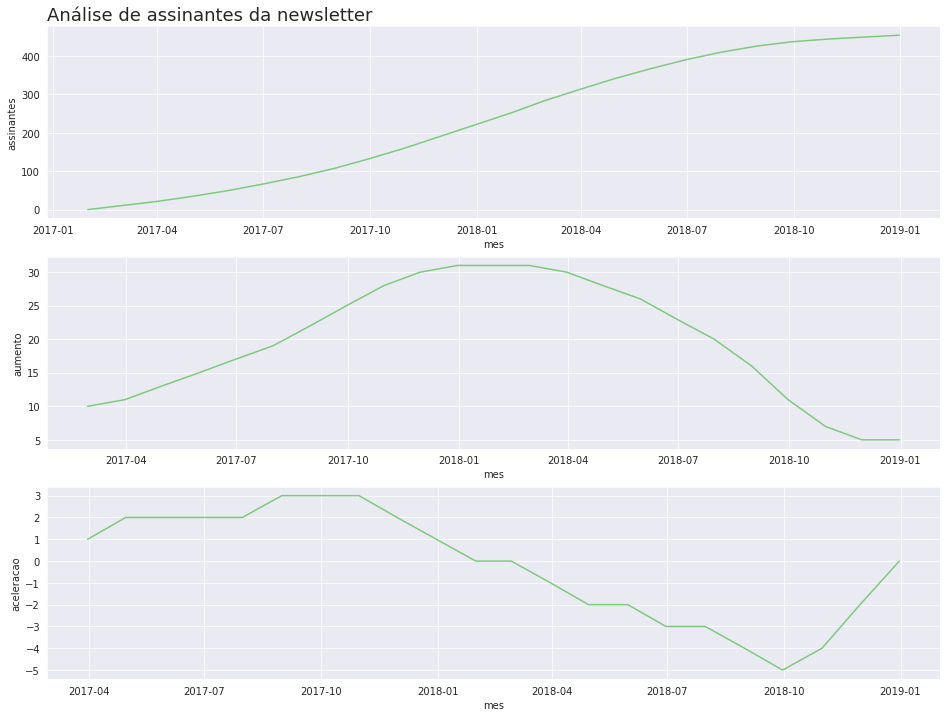

In [ ]:
plot_comparacao('mes', 
                'assinantes', 
                'aumento', 
                'aceleracao', 
                assinantes, 
                'Análise de assinantes da newsletter')

O que vemos nesses gráficos:

*   No gráfico de assinantes podemos ver que o número de assinantes cresce, inicialmente, e, depois, esse aumento se reduz, mas a tendência é de crescimento de qualquer forma.
*   O gráfico de aumento dos assinantes teve um boom, mas chegando num determinado período de tempo, um pouco antes do mês 4 de 2018, o aumento começa a cair.
*   A aceleração começa positiva, entretanto, se torna negativa muito significantemente. No mês 10 de 2018, chega quase a -5 antes de se recuperar um pouco.

Ou seja, fazendo a decomposição, vemos que de fato houve um crescimento, mas depois o aumento do número de assinantes cai de forma notória. Também ocorre desaceleração dos assinantes da newsletter num determinado momento, havendo aceleração negativa, ainda que ela tenha se iniciado positiva.

## Chocolura - Analisando as vendas

**Carregando a base de dados da Chocolura**

Base de dados fornecida pelo curso.

In [ ]:
chocolura = pd.read_csv('/content/drive/MyDrive/Curso Alura/Data Science: Introdução a análise de séries temporais/Dados/chocolura.csv')
chocolura.head()

,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


**Fazendo algumas análises descritivas**

Verificando os tipos de variáveis que temos na base de dados.

Note que a coluna *mes* é do tipo *object*, mas, para trabalhar com Time Series, precisamos convertê-la para *datetime*.

In [ ]:
chocolura.dtypes

mes       object
vendas     int64
dtype: object

Convertendo a coluna *mes* para o tipo *datetime*

In [ ]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

Verificando a quantidade de linhas e colunas que a base de dados possui

In [ ]:
print(f'Quantidade de linhas da base de dados da Chocolura: {chocolura.shape[0]}')
print(f'Quantidade de colunas da base de dados da Chocolura: {chocolura.shape[1]}')

Quantidade de linhas da base de dados da Chocolura: 24
Quantidade de colunas da base de dados da Chocolura: 2


Verificando a quantidade de dados nulos que a base de dados possui

In [ ]:
print(f'Quantidade de dados nulas na base de dados da Chocolura: {chocolura.isna().sum().sum()}')

Quantidade de dados nulas na base de dados da Chocolura: 0


**Chocolura - Decompondo as vendas**

In [ ]:
chocolura['aumento'] = chocolura['vendas'].diff()
chocolura['aceleracao'] = chocolura['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


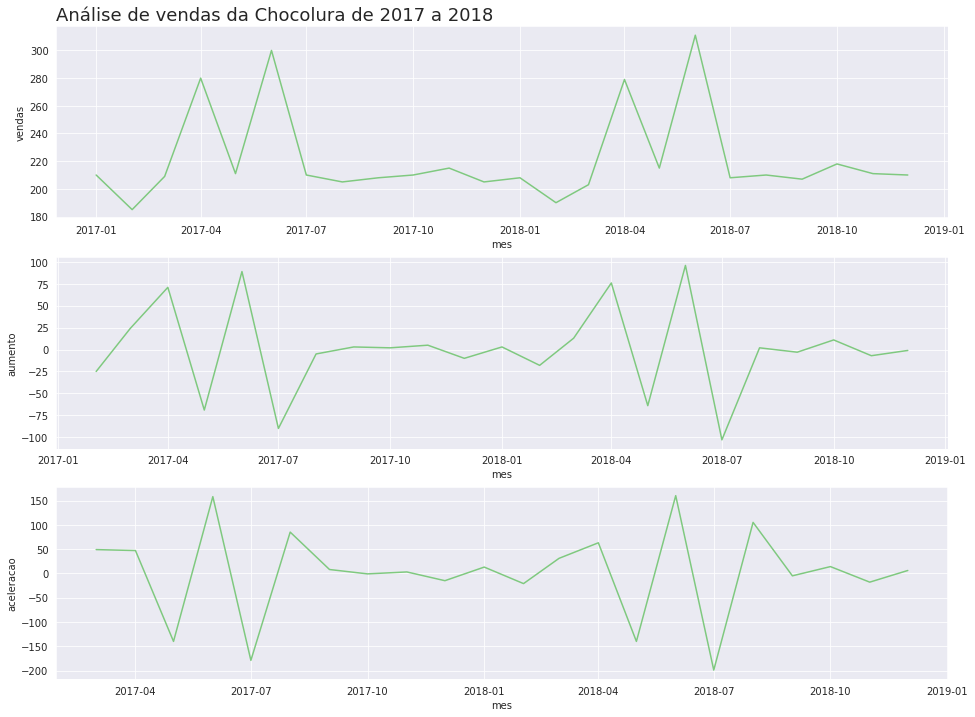

In [ ]:
plot_comparacao('mes', 
                'vendas', 
                'aumento', 
                'aceleracao', 
                chocolura, 
                'Análise de vendas da Chocolura de 2017 a 2018')

O que vemos nesses gráficos:

Começando com a análise de vendas, o gráfico começa com uma queda das vendas no mês de Janeiro de 2017. Há um crescimento grande, especificamente, no mês 4, Abril, e uma queda posterior. Depois, há também um crescimento aproximadamente no mês 6, Junho.

De Julho de 2017 ao mês de Janeiro de 2018 ocorre novamente uma queda, e se repete o crescimento no mês 4 de 2018 e no mês 6. Ou seja, o que acontece é que podemos encontrar algo interessante com relação a Time Series: a sazonalidade.

A sazonalidade é um padrão repetitivo dentro de um determinado período fixo de tempo. Ou seja, sempre no mês 4 e no 6 a empresa venderá mais chocolate. Durante os demais meses, vende menos.

Esse comportamento é muito característico das séries temporais. Podemos vê-lo também no gráfico do aumento. Há um aumento no mês 4 de acordo com o gráfico, e uma grande queda na sequência. Depois as vendas aumentam novamente no mês 6, e há queda de novo. Há uma relativa estabilidade até chegar novamente o mês de Abril do ano seguinte.

Até no gráfico de aceleração do aumento das vendas é possível visualizar essa questão. Isso significa que o padrão de sazonalidade é muito forte, pois se mantém em ambos os gráficos de aumento e aceleração.

Agora que já sabemos o que é sazonalidade, podemos pensar no motivo de esse fenômeno ocorrer nesses meses: no mês de Abril, ocorre a Páscoa e, no mês de Junho, o Dia dos Namorados. Isso pode explicar o padrão visto nos gráficos!

## Chocolura - Vendas diárias de uma determinada loja da Chocolura (Outubro e Novembro)

**Carregando a base de dados de vendas diárias de uma das lojas da Chocolura**

Base de dados fornecida pelo curso.

In [ ]:
vendas_por_dia = pd.read_csv('/content/drive/MyDrive/Curso Alura/Data Science: Introdução a análise de séries temporais/Dados/vendas_por_dia.csv')
vendas_por_dia.head()

,dia,vendas
0,2018-10-01,50
1,2018-10-02,48
2,2018-10-03,56
3,2018-10-04,50
4,2018-10-05,51


**Fazendo algumas análises descritivas**

Verificando quantas linhas e colunas a base de dados possui

In [ ]:
print(f'Quantidade de linhas da base de dados de vendas por dia da Chocolura: {vendas_por_dia.shape[0]}')
print(f'Quantidade de colunas da base de dados de vendas por dia da Chocolura: {vendas_por_dia.shape[1]}')

Quantidade de linhas da base de dados de vendas por dia da Chocolura: 61
Quantidade de colunas da base de dados de vendas por dia da Chocolura: 2


Verificando quantos valores nulos a base de dados possui

In [ ]:
print(f'Quantidade de dados nulas na base de dados de vendas por dia da Chocolura: {vendas_por_dia.isna().sum().sum()}')

Quantidade de dados nulas na base de dados de vendas por dia da Chocolura: 0


Verificando os tipos de variáveis que temos na base de dados.

Note que a coluna *dia* é do tipo *object*, mas, para trabalhar com Time Series, precisamos convertê-la para *datetime*.

In [ ]:
vendas_por_dia.dtypes

dia       object
vendas     int64
dtype: object

Convertendo a coluna *dia* para o tipo *datetime*

In [ ]:
vendas_por_dia['dia'] = pd.to_datetime(vendas_por_dia['dia'])
vendas_por_dia.dtypes

dia       datetime64[ns]
vendas             int64
dtype: object

**Chocolura - Decompondo as vendas diárias de Outubro e Novembro**

In [ ]:
vendas_por_dia['aumento'] = vendas_por_dia['vendas'].diff()
vendas_por_dia['aceleracao'] = vendas_por_dia['aumento'].diff()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao
0,2018-10-01,50,NaN,NaN
1,2018-10-02,48,-2.0,NaN
2,2018-10-03,56,8.0,10.0
3,2018-10-04,50,-6.0,-14.0
4,2018-10-05,51,1.0,7.0


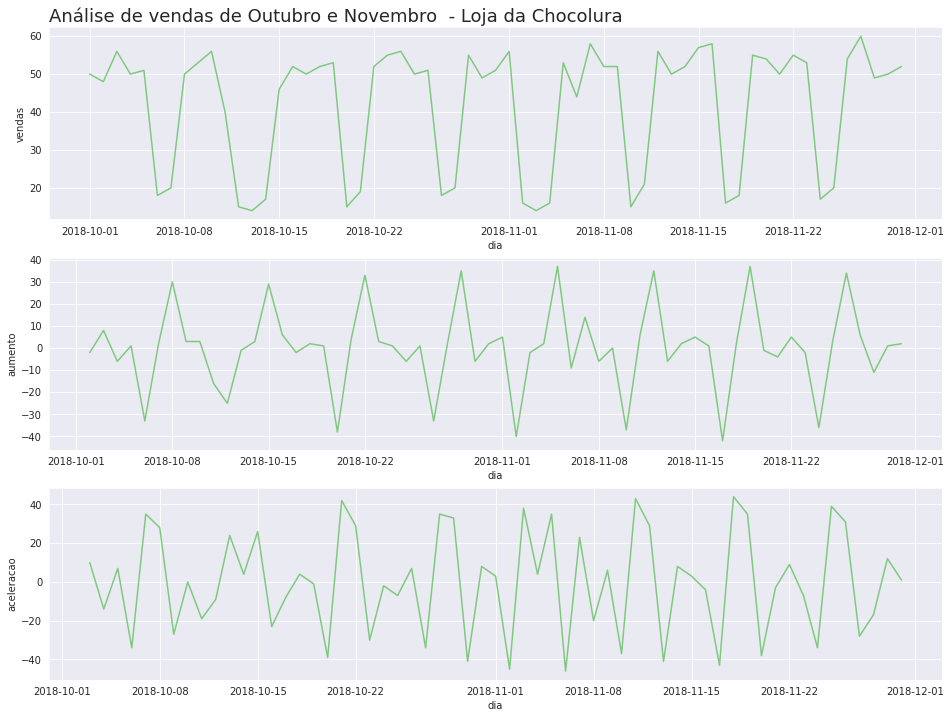

In [ ]:
plot_comparacao('dia',
                'vendas',
                'aumento',
                'aceleracao',
                vendas_por_dia,
                'Análise de vendas de Outubro e Novembro  - Loja da Chocolura')

**Analisando a sazonalidade**

Criando uma coluna de dia da semana

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia'].dt.day_name()
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Monday
1,2018-10-02,48,-2.0,NaN,Tuesday
2,2018-10-03,56,8.0,10.0,Wednesday
3,2018-10-04,50,-6.0,-14.0,Thursday
4,2018-10-05,51,1.0,7.0,Friday


Traduzindo os dias da semana para português

In [ ]:
vendas_por_dia['dia_da_semana'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
dias_traduzidos = {'Monday': 'Segunda',
                   'Tuesday': 'Terca',
                   'Wednesday': 'Quarta',
                   'Thursday': 'Quinta',
                   'Friday': 'Sexta',
                   'Saturday': 'Sabado',
                   'Sunday': 'Domingo'}

In [ ]:
vendas_por_dia['dia_da_semana'] = vendas_por_dia['dia_da_semana'].map(dias_traduzidos)
vendas_por_dia.head()

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta


Verificando 14 dias

In [ ]:
vendas_por_dia.head(14)

,dia,vendas,aumento,aceleracao,dia_da_semana
0,2018-10-01,50,NaN,NaN,Segunda
1,2018-10-02,48,-2.0,NaN,Terca
2,2018-10-03,56,8.0,10.0,Quarta
3,2018-10-04,50,-6.0,-14.0,Quinta
4,2018-10-05,51,1.0,7.0,Sexta
5,2018-10-06,18,-33.0,-34.0,Sabado
6,2018-10-07,20,2.0,35.0,Domingo
7,2018-10-08,50,30.0,28.0,Segunda
8,2018-10-09,53,3.0,-27.0,Terca
9,2018-10-10,56,3.0,0.0,Quarta


**Agrupando os dias**

E tomando a média

In [ ]:
vendas_agrupadas = vendas_por_dia.groupby('dia_da_semana')['vendas', 'aumento', 'aceleracao'].mean().round()
vendas_agrupadas

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,vendas,aumento,aceleracao
dia_da_semana,,,
Domingo,19.0,3.0,31.0
Quarta,53.0,1.0,2.0
Quinta,51.0,-2.0,-3.0
Sabado,16.0,-28.0,-20.0
Segunda,52.0,34.0,31.0
Sexta,45.0,-7.0,-5.0
Terca,52.0,-1.0,-34.0


**Correlação das vendas diárias**

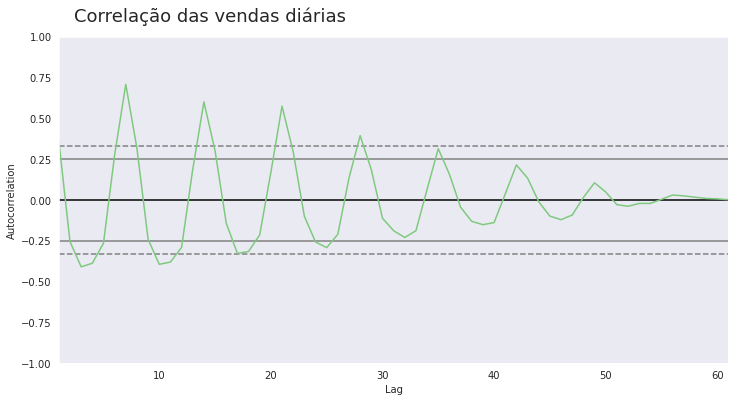

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação das vendas diárias', fontsize=18, x=0.3, y=0.95)
autocorrelation_plot(vendas_por_dia['vendas'])
ax=ax

Observe que temos uma correlação muito forte entre as vendas, que chega a sair da margem de significância atingindo 0.75, e diminui conforme os Lags.

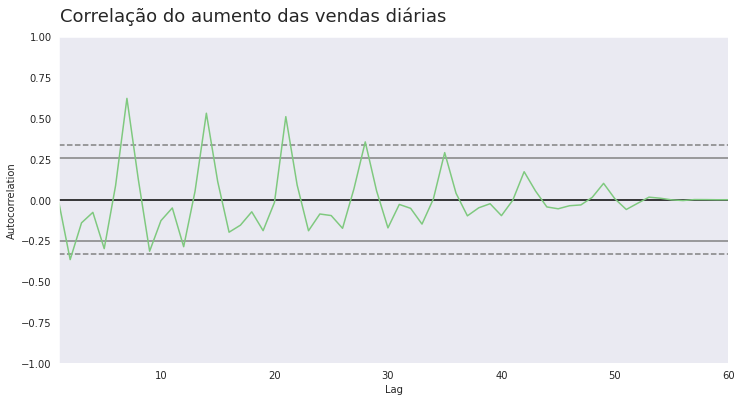

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação do aumento das vendas diárias', fontsize=18, x=0.35, y=0.95)
autocorrelation_plot(vendas_por_dia['aumento'][1:])
ax=ax

Observe que temos uma correlação muito forte entre os aumentos, que chega a sair da margem de significância atingindo quase 0.75, e diminui conforme os Lags.

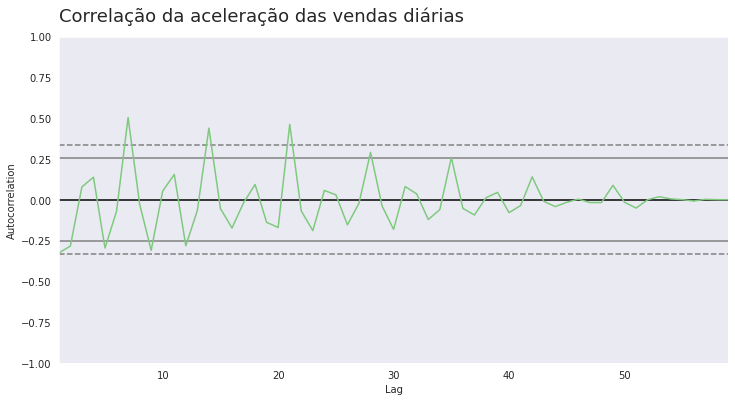

In [ ]:
ax = plt.figure(figsize=(12,6))
ax.suptitle('Correlação da aceleração das vendas diárias', fontsize=18, x=0.36, y=0.95)
autocorrelation_plot(vendas_por_dia['aceleracao'][2:])
ax=ax

Observe que temos uma correlação forte, mas um pouco menor do que nos outros dois casos, que chega a sair da margem de significância atingindo 0.50, e diminui conforme os Lags, chegando a ficar nulo no final.

Portanto, a partir desses gráficos, conseguimos concluir que, de fato, há uma correlação entre as vendas, entre os aumentos e entre as acelerações diárias.

## Cafelura - Analisando as vendas

**Carregando a base de dados**

Base de dados fornecida pelo curso.

In [ ]:
cafelura = pd.read_csv('/content/drive/MyDrive/Curso Alura/Data Science: Introdução a análise de séries temporais/Dados/cafelura.csv')
cafelura.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


**Fazendo algumas análises descritivas**

In [ ]:
cafelura.dtypes

mes       object
vendas     int64
dtype: object

In [ ]:
cafelura['mes'] = pd.to_datetime(cafelura['mes'])
cafelura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [ ]:
print(f'Quantidade de linhas da base de dados da Cafelura: {cafelura.shape[0]}')
print(f'Quantidade de colunas da base de dados da Cafelura: {cafelura.shape[1]}')

Quantidade de linhas da base de dados da Cafelura: 24
Quantidade de colunas da base de dados da Cafelura: 2


In [ ]:
print(f'Quantidade de dados nulos na base de dados da Cafelura: {cafelura.isna().sum().sum()}')

Quantidade de dados nulos na base de dados da Cafelura: 0


**Análises gráficas**

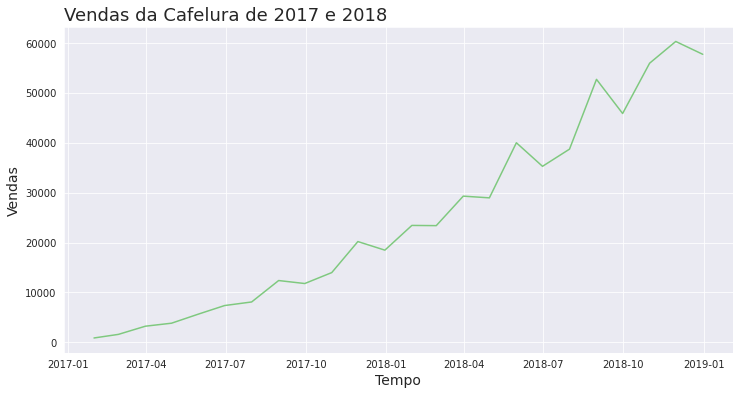

In [ ]:
plotar('Vendas da Cafelura de 2017 e 2018',
       'Tempo',
       'Vendas',
       'mes',
       'vendas',
       cafelura)

Conseguimos ver que as vendas estão aumentando conforme o tempo passa. Além disso, conseguimos notar que há alguns picos em alguns momentos, mas que não caracterizam uma sazonalidade, pois não há um padrão no tempo.

Para analisar com mais precisão, podemos usar o processo de normalização. Para isso, vamos carregar a base de dados de dias de final de semana (base de dados disponibilizada pelo curso).

**Carregando a base de dados de dias de final de semana**

Base de dados fornecida pelo curso.

In [ ]:
qtde_dias_fds = pd.read_csv('/content/drive/MyDrive/Curso Alura/Data Science: Introdução a análise de séries temporais/Dados/dias_final_de_semana.csv')
qtde_dias_fds.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [ ]:
qtde_dias_fds['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

**Criando uma nova coluna no dataframe da Cafelura**

Essa coluna terá o valor das vendas normalizado pela quantidade de dias de final de semana de cada mês.

In [ ]:
cafelura['vendas_normalizadas'] = cafelura['vendas'] / qtde_dias_fds['quantidade_de_dias'].values
cafelura.head()

,mes,vendas,vendas_normalizadas
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


**Visualizando graficamente as vendas normalizadas**

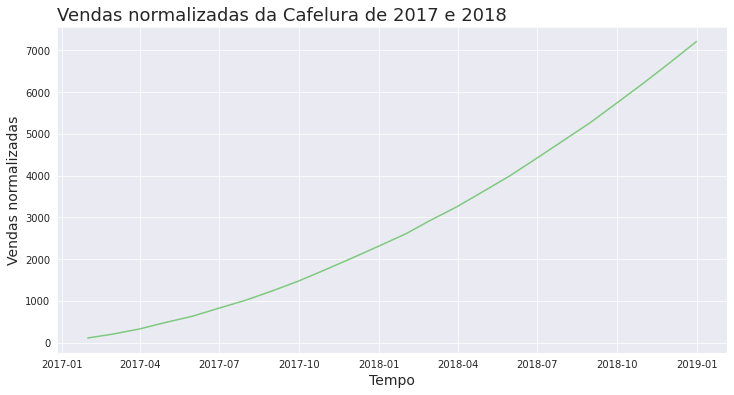

In [ ]:
plotar('Vendas normalizadas da Cafelura de 2017 e 2018',
       'Tempo',
       'Vendas normalizadas',
       'mes',
       'vendas_normalizadas',
       cafelura)

**Visualizando os dois gráficos: Vendas da Cafelura e Vendas normalizadas da Cafelura**

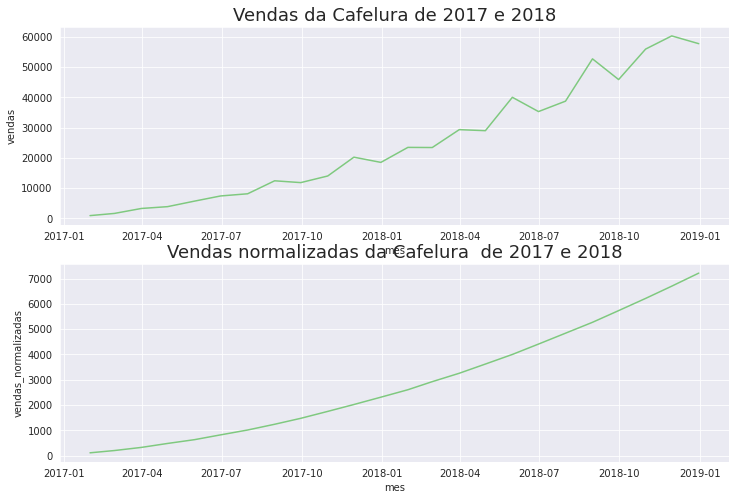

In [ ]:
plt.figure(figsize=(12,8))
ax=plt.subplot(2,1,1)
ax.set_title('Vendas da Cafelura de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas', data=cafelura)
ax=plt.subplot(2,1,2)
ax.set_title('Vendas normalizadas da Cafelura  de 2017 e 2018', fontsize=18)
sns.lineplot(x='mes', y='vendas_normalizadas', data=cafelura)
ax=ax 

### Statsmodels

Sempre que analisamos Time Series, é necessário identificar componentes como a tendência, a sazonalidade e as variações aleatórias, os ruídos.

Será que existe alguma forma de passar os dados e eles nos mostrarem o que será a tendência, a sazonalidade e o ruído de uma só vez? Sim, para isso, podemos usar o Statsmodels.

**Importando a biblioteca**

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

**Utilizando o Statsmodels**

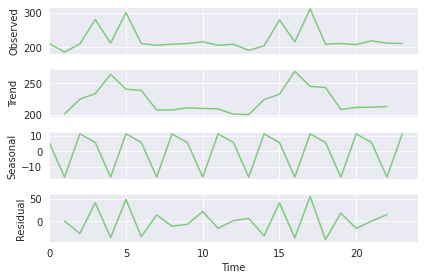

In [ ]:
resultado = seasonal_decompose([chocolura['vendas']], freq=3)
ax = resultado.plot()

**Criando uma melhor visualização**

In [ ]:
observacao = resultado.observed
tendencia = resultado.trend
sazonalidade = resultado.seasonal
ruido = resultado.resid

In [ ]:
data = ({
    'observacao': observacao,
    'tendencia': tendencia,
    'sazonalidade': sazonalidade,
    'ruido': ruido
})

resultado = pd.DataFrame(data)
resultado.head()

,observacao,tendencia,sazonalidade,ruido
0,210,NaN,5.603175,NaN
1,185,201.333333,-16.730159,0.396825
2,209,224.666667,11.126984,-26.793651
3,280,233.333333,5.603175,41.063492
4,211,263.666667,-16.730159,-35.936508


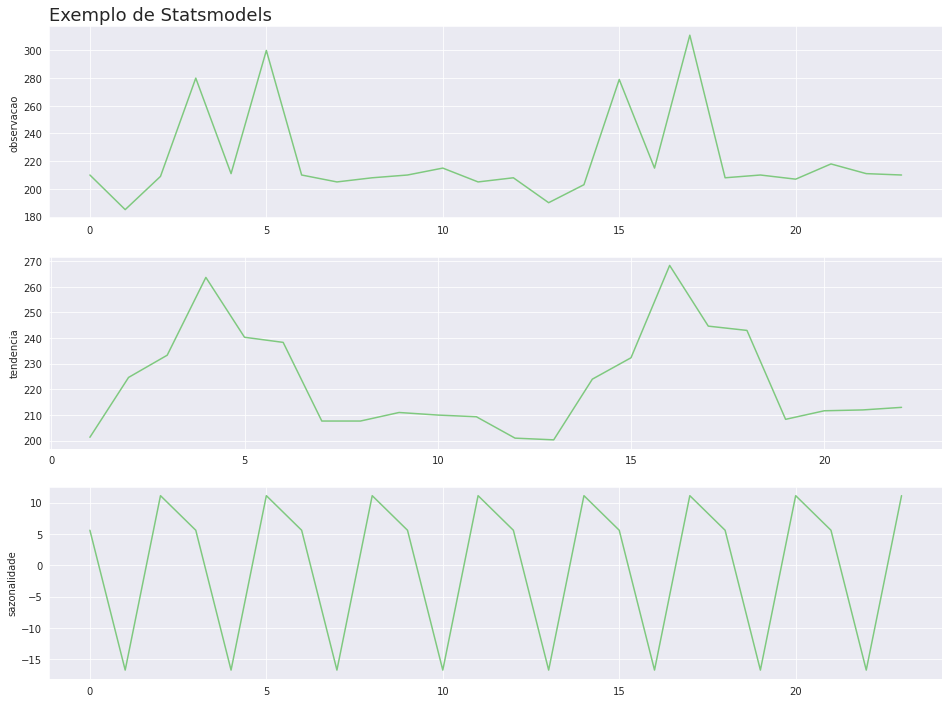

In [ ]:
plot_comparacao(resultado.index, 
                'observacao', 
                'tendencia', 
                'sazonalidade', 
                resultado, 
                'Exemplo de Statsmodels')